#### This cell is  used to define bras, kets, brackets for latex
$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
$

# Oracle-based algorithms

The structure of several oracle-based algorithms can be summarized by the following process:

1. We are given a function $f:[0,1]^n \rightarrow [0,1]^m$
2. We create a circuit with $n$ input qubits and $m$ control qubits.
3. We put the input qubits in superpositions using Hadamard operators. The initial state of the control qubits depends on the problem.
4. We apply the controlled-f operator $U_f$ to all the qubits 
5. We apply another set of Hadamard to the input qubits and measure them.

The following is the pictorial representation of the algorithms:

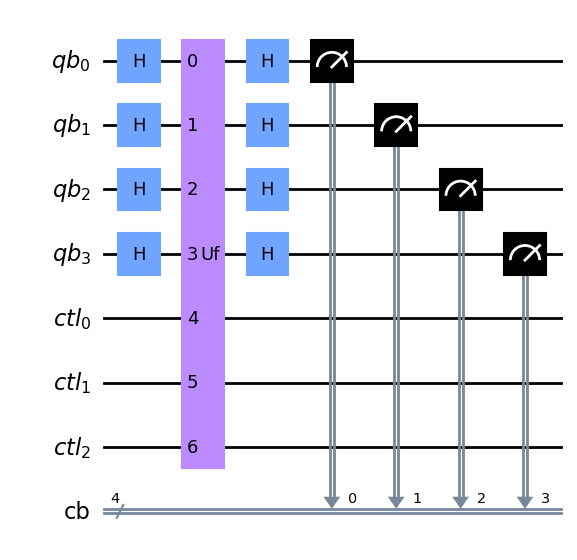

In [18]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qc.qiskit_helper import hadamard, measure, simulate

n = 4
m = 3

gate = QuantumCircuit(n+m).to_gate()
gate.name = "Uf"

qr = QuantumRegister(n, 'qb')
anc = QuantumRegister(m, 'ctl')
cr = ClassicalRegister(n, 'cb')
qc = QuantumCircuit(qr, anc, cr)
hadamard(qc, n)
qc.append(gate,  range(n+m))
hadamard(qc, n)
measure(qc, n)
qc.draw(output='mpl')

If we start the input qubits in state $\ket{0}$ and control qubits in state $\ket{y}$, the circuit can be represented tensorially as:

$$
(H^{\otimes n}\otimes I)U_f(H^{\otimes n}\otimes I)\ket{0}\ket{y}
$$

$$
(H^{\otimes n}\otimes I)\ket{0}\ket{y} = (H^{\otimes n}\ket{0}\ket{y} =  \frac{1}{\sqrt{2^n}}\sum_{x\in[0,1]^n}\ket{x}\ket{y}
$$

$$
U_f(H^{\otimes n}\otimes I)\ket{0}\ket{y} = (H^{\otimes n}\ket{0}\ket{y} =  
\frac{1}{\sqrt{2^n}}\sum_{x\in[0,1]^n}\ket{x}\ket{y\otimes f(x)}
$$

$$
(H^{\otimes n}\otimes I)U_f(H^{\otimes n}\otimes I)\ket{0}\ket{y} = (H^{\otimes n}\ket{0}\ket{y} =  
\frac{1}{2^n}\sum_{x\in[0,1]^n}\sum_{z\in[0,1]^n}(-1)^{<z,x>}\ket{z}\ket{y\otimes f(x)}
$$

### Deutsch-Josza

$$
f(x) = constant/balanced, \ket{y} = \ket{-}
$$

$$
\ket{-\otimes f(x)} = \frac{1}{\sqrt{2}}(\ket{f(x)}-\ket{\bar{f}(x)} = (-1)^{f(x)}\ket{-}
$$

$$
(H^{\otimes n}\otimes I)U_f(H^{\otimes n}\otimes I)\ket{0}\ket{-} = 
\frac{1}{2^n}\sum_{x\in[0,1]^n}\sum_{z\in[0,1]^n}(-1)^{<z,x>}(-1)^{f(x)}\ket{z}\ket{-} =\\
\frac{1}{2^n}\sum_{z\in[0,1]^n}\sum_{x\in[0,1]^n}(-1)^{<z,x>\oplus f(x)}\ket{z}\ket{-}
$$

The amplitude correspoding to $\ket{0}$ is 
$\frac{1}{2^n}\sum_{x\in[0,1]^n}(-1)^{<0,x>\oplus f(x)} = \frac{1}{2^n}\sum_{x\in[0,1]^n}(-1)^{f(x)}$,

If $f$ is constant, this is equal to  $\frac{1}{2^n}\sum_{x\in[0,1]^n}(-1)^c = \pm 1$, so the probability of measuring $\ket{0}$ is 1. 

### Bernstein-Vazirani 

$$
f(x) = <c,x>,  \ket{y} = \ket{-}
$$

As before, we have 

$$
U_f(H^{\otimes n}\otimes I)\ket{0}\ket{-} = 
\frac{1}{\sqrt{2^n}}\sum_{x\in[0,1]^n}\ket{x}\ket{y\otimes f(x)} = \\
\frac{1}{\sqrt{2^n}}\sum_{x\in[0,1]^n}(-1)^{ f(x)}\ket{z}\ket{-}=\\
\frac{1}{\sqrt{2^n}}\sum_{x\in[0,1]^n}(-1)^{<c,x>}\ket{x}\ket{-} = 
$$

But this is just the Hadamard transform of $\ket{c}$, so applying another Hadamard transform, recovers the state $\ket{c}$:

$$
(H^{\otimes n}\otimes I)U_f(H^{\otimes n}\otimes I)\ket{0}\ket{-} = \\
(H^{\otimes n}\otimes I)\frac{1}{\sqrt{2^n}}\sum_{x\in[0,1]^n}(-1)^{<c,x>}\ket{x}\ket{-} = \\
\ket{c}\ket{-}
$$

### Simon's Problem 

$f: [0,1]^n \rightarrow [0,1]^n$ with $f(x) = f(y)$ iff $x = y \oplus c$ for some $c$ 

In this case, we set $y = \ket{0}_n$ 

$$
(H^{\otimes n}\otimes I)U_f(H^{\otimes n}\otimes I)\ket{0}\ket{0} = (H^{\otimes n}\ket{0}\ket{0} =  
\frac{1}{2^n}\sum_{x\in[0,1]^n}\sum_{z\in[0,1]^n}(-1)^{<z,x>}\ket{z}\ket{f(x)}
$$

For a fixed $f$, we can group together the two coefficients of $\ket{f(x)}$:

$$
\frac{1}{2}\left((-1)^{<z,x>}+(-1)^{<z,x\oplus c>}\right) =\\
\frac{1}{2}\left((-1)^{<z,x>}+(-1)^{<z,x>}(-1)^{<z,c>}\right)
$$

If $<z,c> = 1$, then the coefficient is 0, so the only measurable coefficients, are the ones where $<z,c> = 0$.


Whereas repeating the experiment can produce up to $2^{n-1}$ results, we only need $n$ distinct results to create a system of boolean linear equations:

$$
<𝑧_1,𝑐>=0\\
\ldots\\
<𝑧_n,𝑐>=0
$$

which can be solved for $c$ in $O(n)$ time.